# Beyond Linearity

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


In [44]:
# importing the Auto dataset
auto = pd.read_csv('data/Auto.csv')
auto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [45]:
# Let's look at type of an element in the horsepower column
type(auto.horsepower.iloc[0])


str

In [46]:
# Convert the horsepower column to numeric
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['horsepower'].isna().sum()


5

In [47]:
auto.fillna({'horsepower' : auto['horsepower'].mean()}, inplace=True) 
auto['horsepower'].isna().sum()


0

In [48]:
# Let's add the quadratic term of the horsepower
auto['horsepower2'] = auto.horsepower**2
auto.head(3)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


#### Train-Test split
- We split the dataset into 80% training and 20% test.
- This ensures that we evaluate the model on unseen data.

In [49]:
# Split the data into training and test sets
train, test = train_test_split(auto, test_size=0.8, random_state=1)


## Training And Testing

#### 1.1) Linear model training

In [50]:
# Parameters estimation with statsmodels of a quadratic term and the linear term
linear_model = smf.ols('mpg ~ horsepower', train).fit()
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     118.7
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           2.93e-17
Time:                        16:44:47   Log-Likelihood:                -226.12
No. Observations:                  79   AIC:                             456.2
Df Residuals:                      77   BIC:                             461.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4670      1.481     25.300      0.000      34.518      40.416
horsepower    -0.1419      0.013    -10.894      0.000      -0.168      -0.116
==============================================================================
Omnibus:                        7.227   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.029
Skew:                           0.453   Prob(JB):                       0.0181
Kurtosis:                       4.272   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 1.2) Linear model testing 

In [51]:
# Evaluate the model on the test set
test['predicted_mpg_linear'] = linear_model.predict(test)

# Compute performance metrics
r2_linear = r2_score(test['mpg'], test['predicted_mpg_linear'])
mse_linear = mean_squared_error(test['mpg'], test['predicted_mpg_linear'])
mae_linear = mean_absolute_error(test['mpg'], test['predicted_mpg_linear'])

print("Linear Model Performance:")
print(f"R²: {r2_linear:.4f}")
print(f"MSE: {mse_linear:.4f}")
print(f"MAE: {mae_linear:.4f}")


Linear Model Performance:
R²: 0.5679
MSE: 27.8318
MAE: 4.0840


#### 2.1) Quadratic model training

In [52]:
# Parameters estimation with statsmodels of a quadratic term and the linear term
quadratic_model = smf.ols('mpg ~ horsepower + horsepower2', train).fit()
quadratic_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     62.63
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           8.47e-17
Time:                        16:44:47   Log-Likelihood:                -224.49
No. Observations:                  79   AIC:                             455.0
Df Residuals:                      76   BIC:                             462.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      44.5869      4.243     10.508      0.000      36.136      53.038
horsepower     -0.2700      0.073     -3.707      0.000      -0.415      -0.125
horsepower2     0.0005      0.000      1.787      0.078   -5.89e-05       0.001
==============================================================================
Omnibus:                       11.837   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               19.514
Skew:                           0.543   Prob(JB):                     5.79e-05
Kurtosis:                       5.179   Cond. No.                     1.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2.2) Quadratic model testing

In [53]:
# Evaluate the quadratic model on the test set
test['predicted_mpg_quadratic'] = quadratic_model.predict(test)

# Compute performance metrics
r2_quadratic = r2_score(test['mpg'], test['predicted_mpg_quadratic'])
mse_quadratic = mean_squared_error(test['mpg'], test['predicted_mpg_quadratic'])
mae_quadratic = mean_absolute_error(test['mpg'], test['predicted_mpg_quadratic'])

print("Quadratic Model Performance:")
print(f"R²: {r2_quadratic:.4f}")
print(f"MSE: {mse_quadratic:.4f}")
print(f"MAE: {mae_quadratic:.4f}")


Quadratic Model Performance:
R²: 0.6282
MSE: 23.9483
MAE: 3.7284


#### Model comparison on Test

In [54]:
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Quadratic Regression'],
    'R2': [r2_linear, r2_quadratic],
    'MSE': [mse_linear, mse_quadratic],
    'MAE': [mae_linear, mae_quadratic]
})

comparison_df


,Model,R2,MSE,MAE
0,Linear Regression,0.567944,27.831837,4.083982
1,Quadratic Regression,0.628231,23.948290,3.728398


# 📊 Model Evaluation Metrics


When evaluating a regression model, we use different metrics to measure its performance. Below are the key metrics, their formulas, and what they tell us.

---

## 📌 1. Mean Squared Error (MSE)
The **Mean Squared Error (MSE)** measures the average squared difference between the actual and predicted values. It penalizes larger errors more than smaller ones.

### **Formula**:
$$ MSE = \frac{1}{n} \sum (y_{\text{true}} - y_{\text{pred}})^2 $$

### **Interpretation**:
- A lower **MSE** means the model is making better predictions.
- Since the differences are squared, larger errors are weighted more heavily.
- **It is sensitive to outliers**.

---

## 📌 2. Mean Absolute Error (MAE)
The **Mean Absolute Error (MAE)** is the average absolute difference between actual and predicted values. It gives an idea of the typical error size.

### **Formula**:
$$ MAE = \frac{1}{n} \sum |y_{\text{true}} - y_{\text{pred}}| $$

### **Interpretation**:
- A lower **MAE** means the model makes more accurate predictions.
- Unlike MSE, **MAE does not square the errors**, so it treats all errors equally.
- **Less sensitive to outliers** than MSE.

---

## 📌 3. Coefficient of Determination (R²)
The **R² (R-squared)** measures how well the model explains the variability of the target variable. It is also called the "goodness of fit" measure.

### **Formula**:
$$ R^2 = 1 - \frac{\sum (y_{\text{true}} - y_{\text{pred}})^2}{\sum (y_{\text{true}} - \bar{y})^2} $$

Where:
- \( y_{\text{true}} \) are the actual values,
- \( y_{\text{pred}} \) are the predicted values,
- \( \bar{y} \) is the mean of the actual values.

### **Interpretation**:
- **R² = 1** → The model perfectly explains the data.
- **R² = 0** → The model explains nothing; it's like guessing the average value.
- **R² < 0** → The model is worse than just using the mean.

---

## 📌 Key Differences
| Metric  | Measures | Sensitive to Outliers? | Range |
|---------|---------|-----------------------|-------|
| **MSE** | Average squared error | ✅ Yes (highly) | [0, ∞) |
| **MAE** | Average absolute error | ❌ No | [0, ∞) |
| **R²**  | Variance explained | ❌ No | (-∞, 1] |

- **Use MSE** when you want to penalize large errors more.
- **Use MAE** when you want a simple error measure with equal weight for all errors.
- **Use R²** to understand how well the model explains the variability of the data.

---

📌 **Conclusion**:
- **If MSE and MAE are low**, the model predicts well.
- **If R² is high (close to 1)**, the model explains most of the variability.
- **If R² is low (close to 0 or negative)**, the model is not good.

---


#### Graphically

In [55]:
# Hexadecimal colors
color_blue = "#1a559e"
color_pink = "#e71d71"
colore_black = "#0070c0"
color_gold = "#FFD700"

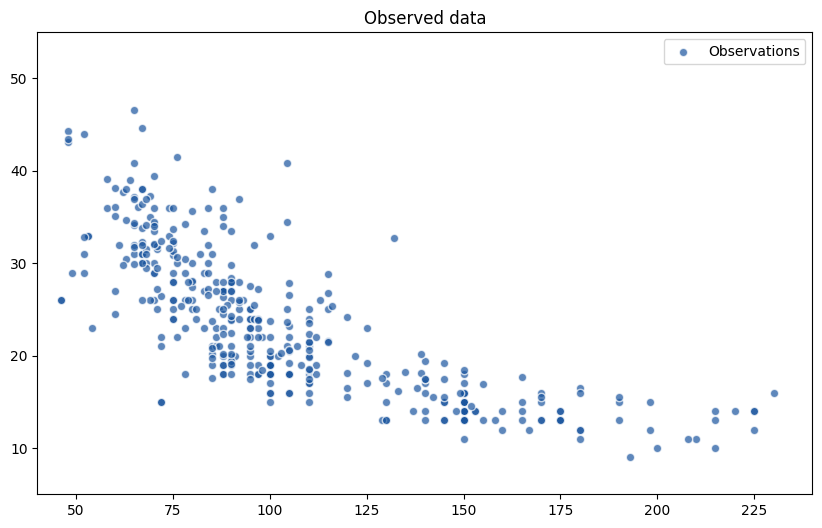

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(auto.horsepower, auto.mpg, facecolors=color_blue, edgecolors='white', alpha=.7, label='Observations')
plt.title('Observed data')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240)
plt.show()

c:\Users\vinor\Desktop\Develhope\projects\EDU-LinearRegression\.venv\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


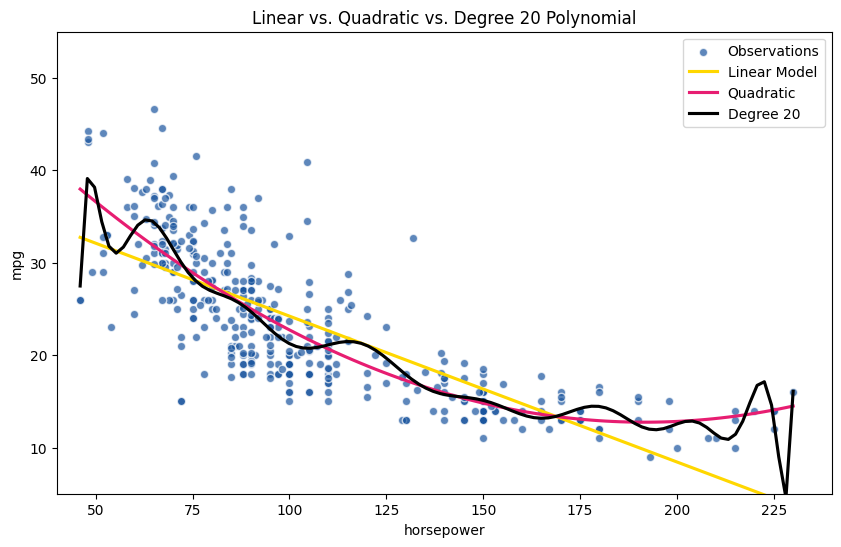

In [57]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.figure(figsize=(10,6))
plt.scatter(auto.horsepower, auto.mpg, facecolors=color_blue, edgecolors='white', alpha=.7, label='Observations') 
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Linear Model', scatter=False, color=color_gold)
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Quadratic', order=2, scatter=False, color=color_pink)
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Degree 20', order=20, scatter=False, color='black')
plt.title('Linear vs. Quadratic vs. Degree 20 Polynomial')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240)
plt.show()
